# Sentiment Analysis Model for classifying Restaurant Reviews

**Problem Statement**

Develop a sentiment analysis model to classify restarunt reviews as positve or negative

**Description**
* The purpose of this analysis is to build a prediction model to predict whether a review on the restaurant is positive or negative.
* With the rapid growth of online platforms for sharing opinions and reviews,restarunts often rely on the customer feedback to imporve their services and attract   a new customers.
* Analyzing the sentiment of these reviews can provide valuable insights into customer satisfaction.

**Importing the Required Libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import word_tokenize

In [5]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
import string
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [27]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
import re
!pip install contractions
import contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 5.7 MB/s eta 0:00:00


In [9]:
!pip install emoji
import emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 8.7 MB/s eta 0:00:00


In [10]:
!pip install beautifulsoup4
from bs4 import BeautifulSoup

In [11]:
#Mount the google drive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load and Prepare the Data**

In [12]:
#Restaurant_Revies.csv
df = pd.read_csv("/content/drive/MyDrive/AIML_Internship/Restaurant_Reviews.csv")
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [13]:
#Top 5 rows of the dataset
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [14]:
#Bottom 5 rows of the dataset
df.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [15]:
#Information about the dataset like datatypes, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [16]:
#Statistical Information about the dataset
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


**Data Cleaning**

In [17]:
#checking the null values of the data set
df.isnull().sum()

,0
Review,0
Liked,0


In [18]:
#Identifying the duplicates
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [19]:
#checking the value counts
value_counts = df['Liked'].value_counts()
print(value_counts)

Liked
1    500
0    500
Name: count, dtype: int64


**Visualization**

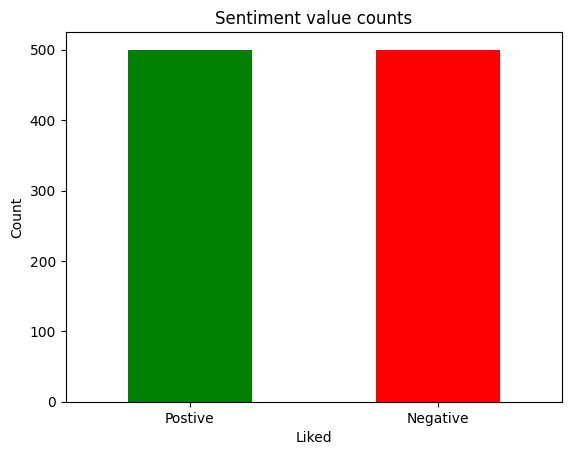

In [20]:
value_counts.plot(kind = 'bar' , color = ['green', 'red'])
plt.title("Sentiment value counts")
plt.xlabel('Liked')
plt.ylabel('Count')
plt.xticks(ticks=[0,1] , labels=['Postive','Negative'],rotation=0)
plt.show()

**Word Cloud of Reviews**

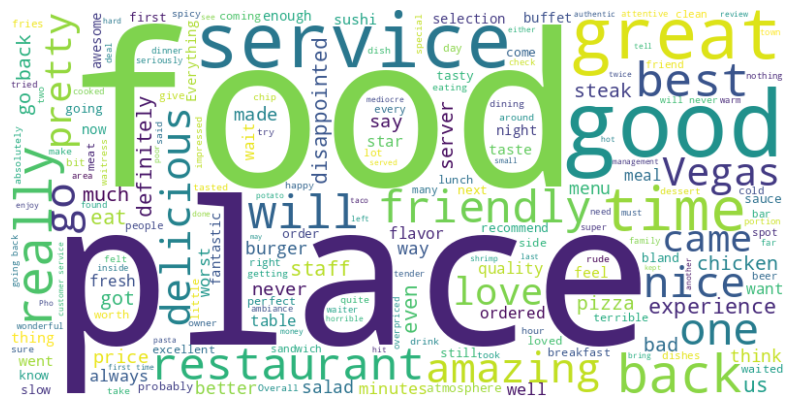

In [21]:
combined_text = " ".join(df['Review'])
wordcloud = WordCloud(width = 800 , height = 400 ,background_color = 'white').generate(combined_text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

**Frequency of specific words in Reviews**

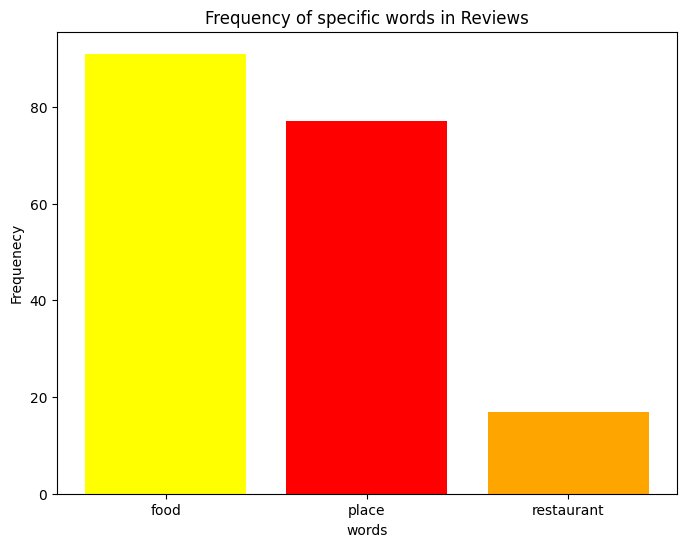

In [22]:
target_words = ['food','place','restaurant']
all_words = " ".join(df['Review']).lower().split()
word_counts = Counter(all_words)
target_word_counts = {word:word_counts[word] for word in target_words}
plt.figure(figsize=(8,6))
plt.bar(target_word_counts.keys(),target_word_counts.values() , color = ['yellow','red','orange'])
plt.xlabel('words')
plt.ylabel('Frequenecy')
plt.title('Frequency of specific words in Reviews')
plt.show()

**Text Processing**

In [23]:
#convert a data set into lower case
lowercased_text = df['Review'].str.lower()
print(lowercased_text)

0                               wow... loved this place.
1                                     crust is not good.
2              not tasty and the texture was just nasty.
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone.
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming, and i ...
999    then, as if i hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [28]:
df['Tokens'] = df['Review'].apply(word_tokenize)
print(df['Tokens'])

0                      [Wow, ..., Loved, this, place, .]
1                              [Crust, is, not, good, .]
2      [Not, tasty, and, the, texture, was, just, nas...
3      [Stopped, by, during, the, late, May, bank, ho...
4      [The, selection, on, the, menu, was, great, an...
                             ...                        
995    [I, think, food, should, have, flavor, and, te...
996                       [Appetite, instantly, gone, .]
997    [Overall, I, was, not, impressed, and, would, ...
998    [The, whole, experience, was, underwhelming, ,...
999    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: Tokens, Length: 1000, dtype: object


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
 2   Tokens  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [31]:
df['Review'].value_counts()

,count
Review,
#NAME?,4
The food was terrible.,2
I would not recommend this place.,2
I love this place.,2
I won't be back.,2
...,...
"OMG, the food was delicioso!",1
There is nothing authentic about this place.,1
the spaghetti is nothing special whatsoever.,1


In [32]:
df['Review'] = df['Review'].str.replace(f"[{string.punctuation}]"," ",regex = True)
print(df['Review'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [33]:
df['Review'].value_counts()

,count
Review,
NAME,4
I would not recommend this place,2
I love this place,2
I won t be back,2
Will not be back,2
...,...
The burger I got the Gold Standard a 17 burger and was kind of disappointed,1
OMG the food was delicioso,1
There is nothing authentic about this place,1


In [34]:
#Removing the stop words like this, is , are ,was
stop_words = set(stopwords.words('english'))
df['Tokens'] = df['Review'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])
print(df['Tokens'])

0                                    [Wow, Loved, place]
1                                          [Crust, good]
2                           [Not, tasty, texture, nasty]
3      [Stopped, late, May, bank, holiday, Rick, Stev...
4                  [The, selection, menu, great, prices]
                             ...                        
995           [I, think, food, flavor, texture, lacking]
996                          [Appetite, instantly, gone]
997             [Overall, I, impressed, would, go, back]
998    [The, whole, experience, underwhelming, I, thi...
999    [Then, I, wasted, enough, life, poured, salt, ...
Name: Tokens, Length: 1000, dtype: object


**Stemming**

* Stemming is the process of reducing the a word into root or base word form by removig suffix

* example : driving stemmed is drive

In [35]:
stemmer = PorterStemmer()
df['stemmed'] = df['Review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))
print(df['stemmed'])

0                                     wow love thi place
1                                      crust is not good
2                 not tasti and the textur wa just nasti
3      stop by dure the late may bank holiday off ric...
4      the select on the menu wa great and so were th...
                             ...                        
995    i think food should have flavor and textur and...
996                               appetit instantli gone
997        overal i wa not impress and would not go back
998    the whole experi wa underwhelm and i think we ...
999    then as if i hadn t wast enough of my life the...
Name: stemmed, Length: 1000, dtype: object


**Lemmatization**
* Lemmatization is the process transforming a word into its base or dictionary form
* example is better is lemmtized to good

In [36]:
lemmatizer = WordNetLemmatizer()
df['Lemmatized'] = df['Review'].apply(lambda x :' '.join([lemmatizer.lemmatize(word , pos = wordnet.VERB) for word in word_tokenize(x)]))
print(df['Lemmatized'])

0                                   Wow Loved this place
1                                      Crust be not good
2                Not tasty and the texture be just nasty
3      Stopped by during the late May bank holiday of...
4      The selection on the menu be great and so be t...
                             ...                        
995    I think food should have flavor and texture an...
996                                Appetite instantly go
997       Overall I be not impress and would not go back
998    The whole experience be underwhelming and I th...
999    Then as if I hadn t waste enough of my life th...
Name: Lemmatized, Length: 1000, dtype: object


**Removing the numbers from reviews**

In [37]:
df['No_Numbers'] = df['Review'].apply(lambda x : re.sub(r'\d+',' ' ,x))
print(df['No_Numbers'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: No_Numbers, Length: 1000, dtype: object


In [38]:
#removing special characters like @ # %,*
df['cleaned'] = df['Review'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]','' ,x))
print(df['cleaned'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: cleaned, Length: 1000, dtype: object


**Expanding Method**

* don't eat food in this hotel , when we apply expanted text it will convert into do not eat food in this hotel

In [39]:
df['Expanded'] = df['Review'].apply(contractions.fix)
print(df['Expanded'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: Expanded, Length: 1000, dtype: object


In [40]:
df['emoji'] = df['Review'].apply(emoji.demojize)
print(df['emoji'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: emoji, Length: 1000, dtype: object


In [41]:
df['cleaned'] = df['Review'].apply(lambda x: BeautifulSoup(x,"html.parser").get_text())
print(df['cleaned'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: cleaned, Length: 1000, dtype: object


**Splitting the Data**

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# Create a TfidfVectorizer to convert text to numerical features
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned'])
y = df['Liked']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Train the Model**

In [65]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

**Evaluate the Model**

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       152
           1       0.82      0.78      0.80       148

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



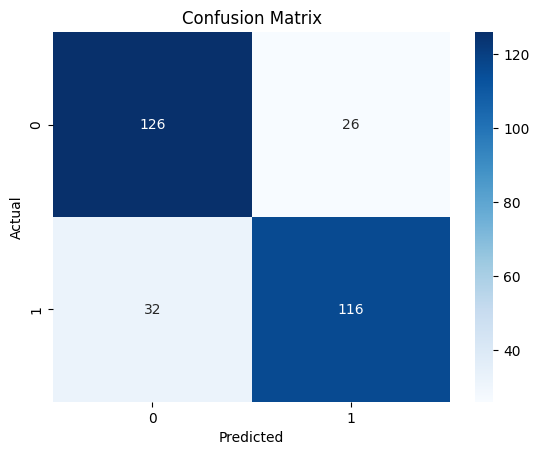

In [66]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Create an Interactive GUI using ipywidgets**

- Now, let's create an interactive GUI where users can input a review and get real-time sentiment analysis predictions. We'll also provide buttons for sample reviews that users can click to test the model.

In [67]:
import ipywidgets as widgets
from IPython.display import display

def predict_sentiment(review):
    # Transform the input review using the vectorizer
    input_vector = vectorizer.transform([review])

    # Predict sentiment
    prediction = model.predict(input_vector)[0]

    # Return the sentiment prediction
    return "Positive" if prediction == 1 else "Negative"

# Text input widget
review_input = widgets.Text(
    placeholder='Enter your review here...',
    description='Review:',
    disabled=False
)

# Button widgets for sample reviews
sample_reviews = [
    "The food was delicious and the service was excellent!",
    "Terrible experience, food was cold and service was slow."
]

sample_buttons = [widgets.Button(description=review) for review in sample_reviews]

def on_button_click(b):
    review_input.value = b.description

for button in sample_buttons:
    button.on_click(on_button_click)

# Output widget for displaying predictions
output = widgets.Output()

def update_output(change):
    output.clear_output()
    with output:
        prediction = predict_sentiment(change['new'])
        print(f"Predicted Sentiment: {prediction}")

review_input.observe(update_output, names='value')

# Display widgets
display(review_input)
display(widgets.HBox(sample_buttons))
display(output)


Text(value='', description='Review:', placeholder='Enter your review here...')

Output()